# Obtenção dos dados

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_data = pd.read_csv('sao-paulo-properties-april-2019.csv')

# EDA

In [8]:
df_data.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


In [10]:
df_data.tail(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046
13639,161987,0,44,2,1,0,1,0,0,0,0,Jardim Ângela/São Paulo,sale,apartment,-23.613391,-46.523109


## Verificando o número de linhas e valores únicos

In [13]:
df_data.shape

(13640, 16)

In [15]:
df_data.nunique()

Price               1881
Condo               1415
Size                 339
Rooms                  8
Toilets                8
Suites                 7
Parking               10
Elevator               2
Furnished              2
Swimming Pool          2
New                    2
District              96
Negotiation Type       2
Property Type          1
Latitude            8405
Longitude           8451
dtype: int64

## Verificando as classificações de dados e suas estátisticas para as colunas que serão o alvo da análise

In [18]:
# Temos vendas e alugéis
df_data['Negotiation Type'].unique()

array(['rent', 'sale'], dtype=object)

In [20]:
# Só existem apartamentos
df_data['Property Type'].unique()

array(['apartment'], dtype=object)

In [22]:
# Analisando somente as negociações de aluguel
df_rent = df_data[df_data['Negotiation Type'] == 'rent']

In [24]:
df_rent.shape

(7228, 16)

In [26]:
round(df_rent.describe(),3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000,7228.000,7228.000,7228.000,7228.000,7228.000,7228.000,7228.000,7228.000,7228.000,7228.000,7228.000,7228.000
mean,3077.669,825.195,89.486,2.304,2.106,1.024,1.452,0.300,0.173,0.488,0.001,-22.032,-43.501
std,3522.830,835.622,63.976,0.829,0.998,0.884,0.890,0.458,0.378,0.500,0.029,5.963,11.675
min,480.000,0.000,30.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,-46.749,-58.364
25%,1350.000,395.750,52.000,2.000,2.000,1.000,1.000,0.000,0.000,0.000,0.000,-23.598,-46.690
50%,2000.000,595.000,67.000,2.000,2.000,1.000,1.000,0.000,0.000,0.000,0.000,-23.556,-46.645
75%,3300.000,990.000,100.000,3.000,2.000,1.000,2.000,1.000,0.000,1.000,0.000,-23.523,-46.585
max,50000.000,9500.000,880.000,10.000,8.000,5.000,9.000,1.000,1.000,1.000,1.000,0.000,0.000


## Análise visual dos dados das colunas referentes a aluguéis

In [29]:
df_aluguel = df_data[df_data['Negotiation Type'] == 'rent']
df_aluguel

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,0,Brooklin/São Paulo,rent,apartment,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,0,Brooklin/São Paulo,rent,apartment,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,0,Brooklin/São Paulo,rent,apartment,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,0,Brooklin/São Paulo,rent,apartment,-23.612287,-46.681482


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

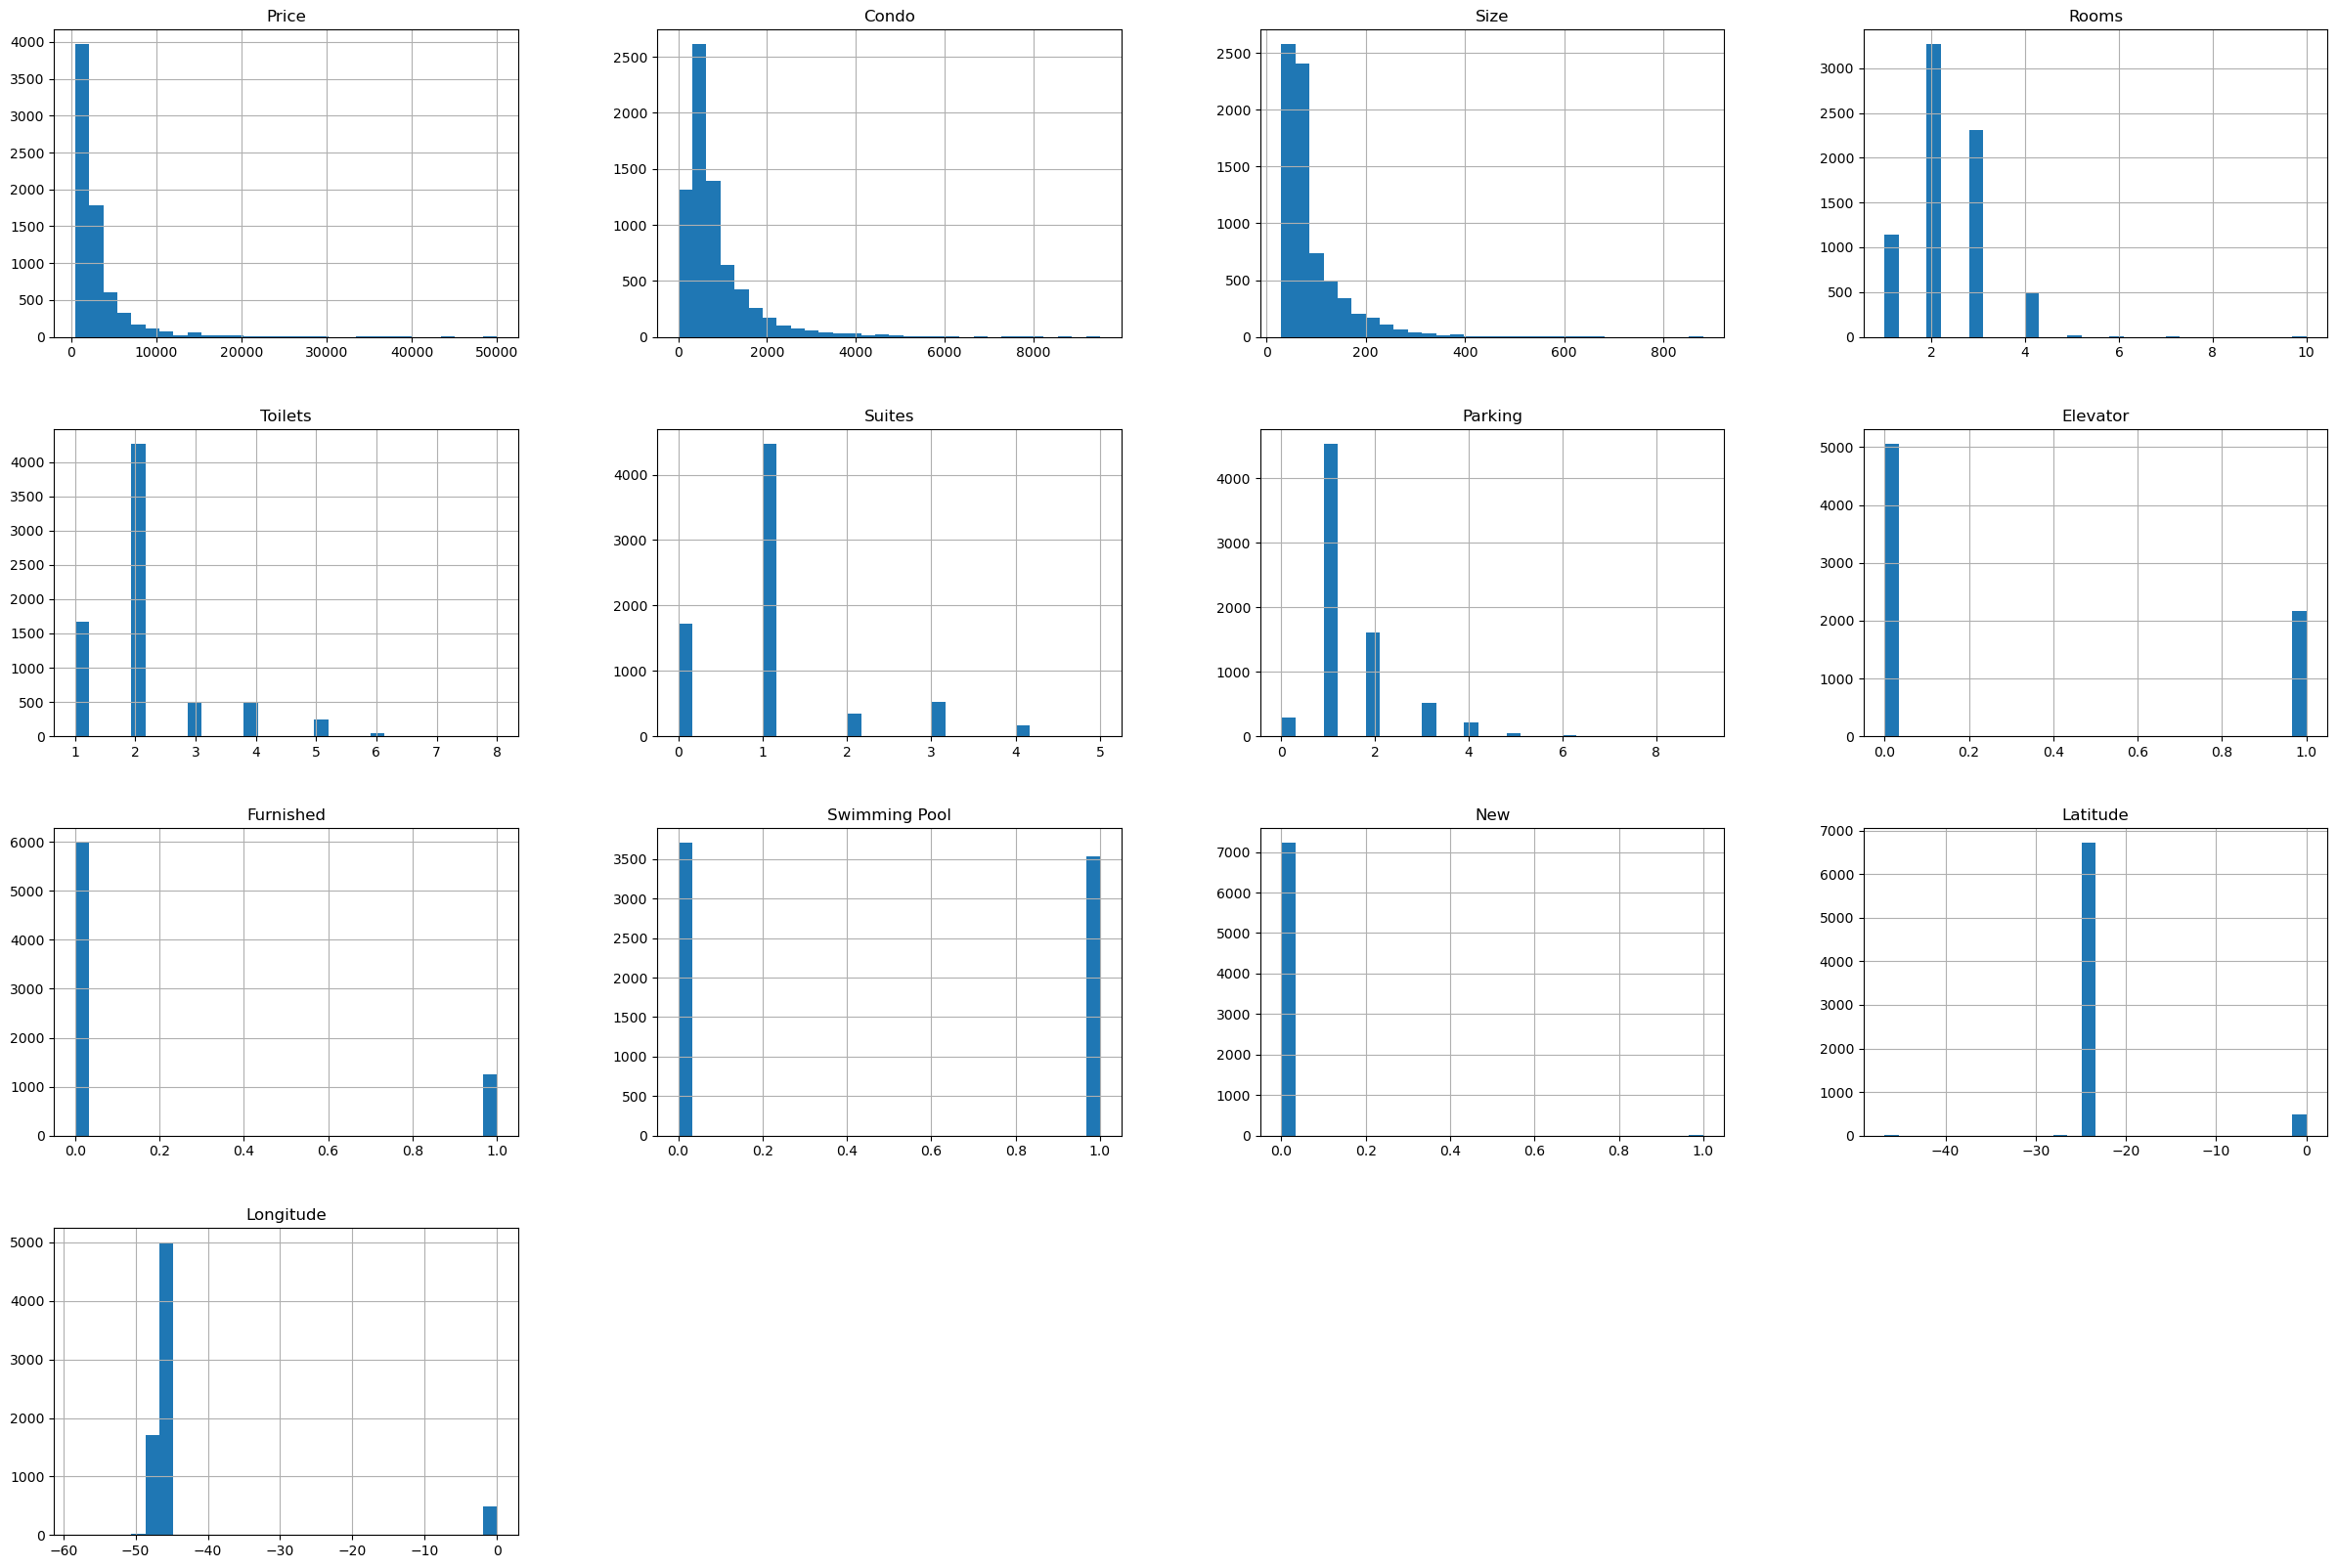

In [31]:
# Percebe-se que a coluna 'New' não vai influenciar no apredizado já que nenhum dos imóveis é novo
df_aluguel.hist(bins=30, figsize=(30,20))

In [32]:
df_matriz = df_aluguel.select_dtypes(include=[float, int])

## Matriz de correlação

In [36]:
df_matriz.corr()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
Price,1.000000,0.700361,0.731795,0.390951,0.583488,0.588329,0.640743,0.031860,0.171859,0.206884,-0.008477,-0.036935,-0.038362
Condo,0.700361,1.000000,0.812374,0.494153,0.596520,0.597069,0.703888,0.020271,0.075928,0.198613,-0.011678,-0.045458,-0.048381
Size,0.731795,0.812374,1.000000,0.673232,0.694294,0.701954,0.752954,0.006993,0.005886,0.148408,-0.017416,-0.043168,-0.046238
Rooms,0.390951,0.494153,0.673232,1.000000,0.557247,0.545859,0.592387,0.000993,-0.104705,0.151225,-0.022166,-0.050753,-0.052897
Toilets,0.583488,0.596520,0.694294,0.557247,1.000000,0.920932,0.703447,0.143176,0.068190,0.262526,-0.007862,-0.128304,-0.129482
Suites,0.588329,0.597069,0.701954,0.545859,0.920932,1.000000,0.718788,0.106189,0.068014,0.267219,-0.006231,-0.130413,-0.131519
Parking,0.640743,0.703888,0.752954,0.592387,0.703447,0.718788,1.000000,0.027476,0.066077,0.304904,0.001547,-0.054828,-0.057929
Elevator,0.031860,0.020271,0.006993,0.000993,0.143176,0.106189,0.027476,1.000000,0.095207,0.150773,0.044049,-0.117160,-0.108175
Furnished,0.171859,0.075928,0.005886,-0.104705,0.068190,0.068014,0.066077,0.095207,1.000000,0.185192,0.012224,-0.022449,-0.018386
Swimming Pool,0.206884,0.198613,0.148408,0.151225,0.262526,0.267219,0.304904,0.150773,0.185192,1.000000,0.019915,-0.025033,-0.020293


In [38]:
df_matriz.corr()['Price'].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

# Preparação dos dados

## Remoção de dados irrelevantes para treinamento

In [42]:
df_clean = df_rent.drop(['New', 'Negotiation Type', 'Property Type'], axis=1)

In [44]:
df_clean

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,Brooklin/São Paulo,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,Brooklin/São Paulo,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,Brooklin/São Paulo,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,Brooklin/São Paulo,-23.612287,-46.681482


## Tratamento de dados categóricos

In [47]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(df_clean[['District']])
housing_cat_1hot

<7228x94 sparse matrix of type '<class 'numpy.float64'>'
	with 7228 stored elements in Compressed Sparse Row format>

In [49]:
one_hot = pd.get_dummies(df_clean['District'])
df = df_clean.drop('District', axis=1)
df.join(one_hot)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1000,148,45,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1000,100,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1000,200,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1300,410,55,2,2,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
11206,21000,3000,208,4,4,3,3,1,1,1,...,False,False,False,False,False,False,False,False,False,False
11207,3800,710,55,1,1,0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False
11208,5000,2354,205,3,2,1,2,1,0,0,...,False,False,False,False,False,False,False,False,False,False


# Treinamento dos modelos

## Definindo dados de treino

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
# Segregando os preços do resto do df
Y = df['Price']
X = df.loc[:, df.columns != 'Price']

In [57]:
# Series dos preços
Y

0          930
1         1000
2         1000
3         1000
4         1300
         ...  
11205     3700
11206    21000
11207     3800
11208     5000
11209    15600
Name: Price, Length: 7228, dtype: int64

In [59]:
# DataFrame sem os preços
X

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,Longitude
0,220,47,2,2,1,1,0,0,0,-23.543138,-46.479486
1,148,45,2,2,1,1,0,0,0,-23.550239,-46.480718
2,100,48,2,2,1,1,0,0,0,-23.542818,-46.485665
3,200,48,2,2,1,1,0,0,0,-23.547171,-46.483014
4,410,55,2,2,1,1,1,0,0,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...
11205,595,73,1,2,1,1,0,0,1,-23.617682,-46.694963
11206,3000,208,4,4,3,3,1,1,1,-23.606891,-46.695934
11207,710,55,1,1,0,1,0,1,1,0.000000,0.000000
11208,2354,205,3,2,1,2,1,0,0,-23.612287,-46.681482


In [61]:
# Defini as variáveis de treino e teste utilizando o padrão de mercado 70% e 30% da base
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [63]:
x_train.shape

(5059, 11)

In [65]:
x_test.shape

(2169, 11)

## Regressão Linear

### Treino

In [69]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [71]:
amostragem_dados = x_train.iloc[:5]
amostragem_labels = y_train.iloc[:5]

In [73]:
amostragem_dados

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,Longitude
9326,610,65,2,2,1,2,1,1,1,-23.468166,-46.589562
1097,2100,134,3,3,1,1,0,0,0,-23.582883,-46.677124
1293,215,48,1,2,1,1,1,0,0,-23.692781,-46.656225
1410,680,72,3,2,1,1,1,0,0,-23.690717,-46.699765
4501,1750,155,3,2,1,2,0,0,1,-23.455555,-46.669972


In [75]:
amostragem_labels

9326    1200
1097    4700
1293    1000
1410    1400
4501    5500
Name: Price, dtype: int64

### Resultados

In [78]:
print('Comparações dos dados do modelo')
print('Predições: ', lin_reg.predict(amostragem_dados))
print('Labels: ', amostragem_labels.values)

Comparações dos dados do modelo
Predições:  [3661.40322291 4494.47951866 1806.06581014 1333.00609797 5353.98786037]
Labels:  [1200 4700 1000 1400 5500]


In [80]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)
lin_rmse = np.sqrt(lin_mse)

In [82]:
# Percebe-se a enrome margem de erro na predição dos valores
lin_rmse

2153.696922992915

## Árvore de decisão

### Treino

In [86]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

### Resultados

In [89]:
print('Comparações dos dados do modelo de árvore de decisão')
print('Predições: ', tree_reg.predict(amostragem_dados))
print('Labels: ', amostragem_labels.values)

Comparações dos dados do modelo de árvore de decisão
Predições:  [1200. 4700. 1000. 1400. 5500.]
Labels:  [1200 4700 1000 1400 5500]


In [91]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)
tree_rmse = np.sqrt(tree_mse)

In [93]:
# Maior assertividade do modelo, mas até onde sei modelos de DecisionTree se adaptam de mais ao dados de treino
tree_rmse

38.56092580594587

# CrossValidation - LinearRegression

In [110]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [135]:
def exibir_scores(scores):
    print('Scores:', scores)
    print('Média:', scores.mean())
    print('Desvio Padrão:', scores.std())


In [137]:
# O modelo de regressão linear se saiu melhor que o outro se tratando de se adequar ao problema como um todo
exibir_scores(lin_rmse_scores)

Scores: [2373.4091404  3174.73019284 2036.56436433 1836.89285106 2745.65050475
 2800.58336217 2537.89648109 2264.31801245 3113.35658824 2457.85205671]
Média: 2534.125355405076
Desvio Padrão: 412.2843416285412


# CrossValidation - DecisionTree

In [127]:
scores = cross_val_score(tree_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [139]:
# O modelo de DecisionTree teve uma média muito pior com dados não vistos anteriormente
exibir_scores(tree_rmse_scores)

Scores: [2491.59920135 3208.91395841 2158.17497862 1791.34921464 3189.11896296
 2517.04164542 2484.22770924 2287.48817806 3108.28000817 2347.99995003]
Média: 2558.419380690234
Desvio Padrão: 447.3506007849006
